In [2]:
# Importing Libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")


In [7]:
## Load Dataset
df = pd.read_csv('isfraud.csv') 
df.head(),df.shape


(   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
 0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
 1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
 2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
 3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
 4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   
 
       nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
 0  M1979787155             0.0             0.0        0               0  
 1  M2044282225             0.0             0.0        0               0  
 2   C553264065             0.0             0.0        1               0  
 3    C38997010         21182.0             0.0        1               0  
 4  M1230701703             0.0             0.0        0               0  ,
 (6362620, 11))

### Checking null values

In [8]:
## Checking null values
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


### Converting categorical data in to numeric data

In [11]:
df['type'] = pd.factorize(df['type'])[0]
df['nameOrig'] = pd.factorize(df['nameOrig'])[0]
df['nameDest'] = pd.factorize(df['nameDest'])[0]





### Droopping non necessary features
**nameOrig** and **nameDest** are not important features as they are categorical features and do not contribute towards Fraud Prediction.

In [18]:
df.drop(['nameDest','nameOrig','isFlaggedFraud'], axis=1, inplace=True)
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,0,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,0,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,1,181.00,181.0,0.00,0.0,0.0,1
3,1,2,181.00,181.0,0.00,21182.0,0.0,1
4,1,0,11668.14,41554.0,29885.86,0.0,0.0,0


## Prediction model using Random ForestTree

### Dividing data in to descriptive and target features

In [20]:
## Making Descriptive and Target Features
descriptive_features = df.iloc[:,:-1]
descriptive_features


,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,0,9839.64,170136.00,160296.36,0.00,0.00
1,1,0,1864.28,21249.00,19384.72,0.00,0.00
2,1,1,181.00,181.00,0.00,0.00,0.00
3,1,2,181.00,181.00,0.00,21182.00,0.00
4,1,0,11668.14,41554.00,29885.86,0.00,0.00
...,...,...,...,...,...,...,...
6362615,743,2,339682.13,339682.13,0.00,0.00,339682.13
6362616,743,1,6311409.28,6311409.28,0.00,0.00,0.00
6362617,743,2,6311409.28,6311409.28,0.00,68488.84,6379898.11
6362618,743,1,850002.52,850002.52,0.00,0.00,0.00


In [19]:
target_feature = df.iloc[:,-1:]
target_feature.head(10)

,isFraud
0,0
1,0
2,1
3,1
4,0
5,0
6,0
7,0
8,0
9,0


### Testing by dividing data into training and testing sub datasets.
75% training and 25% test dataset

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(descriptive_features,target_feature,test_size=0.25,random_state=0)

In [24]:
X_train.shape,y_test.shape,X_test.shape,y_test.shape

((4771965, 7), (1590655, 1), (1590655, 7), (1590655, 1))

### Random Forest Classifier

Training Model

In [33]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=1,criterion='entropy', random_state=1)
classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1, random_state=1)

### Checking important features of the classifier

Feature: 1, Score: 0.05651
Feature: 2, Score: 0.10280
Feature: 3, Score: 0.09803
Feature: 4, Score: 0.30135
Feature: 5, Score: 0.22442
Feature: 6, Score: 0.03031
Feature: 7, Score: 0.18659


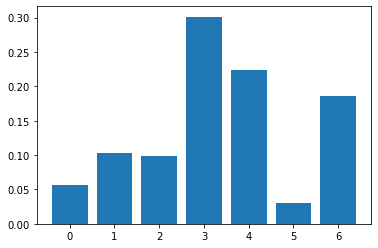

In [34]:
importance_RF = classifier.feature_importances_
importance_RF
# summarize feature importance
for i,v in enumerate(importance_RF):
    print('Feature: %0d, Score: %.5f' % (i+1,v))
# plot feature importance
plt.bar([x for x in range(len(importance_RF))], importance_RF)
plt.show()

Predicting using model

In [35]:
y_pred = classifier.predict(X_test)

Measuring accuracy score

In [36]:

from sklearn.metrics import accuracy_score,f1_score
f1_score_RF = f1_score(y_test,y_pred)
print('f1-score for test set predicted: ',f1_score_RF)


f1-score for test set predicted:  0.8302354399008675
